# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [4]:
# Importando os pacotes e carregando a base de dados

import pandas as pd
import numpy as np
import seaborn as sns
import patsy
import matplotlib.pyplot as plt
import statsmodels.api as sm
import patsy as pt

# Carregar a base de dados
tips = sns.load_dataset('tips')

In [3]:
# 1.1 Criando a matriz de design e o modelo OLS inicial.

# Criar a variável 'net_bill' (conta líquida = total_bill - tip)
tips['net_bill'] = tips['total_bill'] - tips['tip']

# Definir a matriz de design (X) e a matriz resposta (y) utilizando Patsy
y, X = pt.dmatrices('tip ~ sex + smoker + time + net_bill', data=tips, return_type='dataframe')

# Ajustar o modelo OLS (Regressão Linear)
model = sm.OLS(y, X).fit()

# Exibir o resumo do modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     30.13
Date:                Sun, 13 Oct 2024   Prob (F-statistic):           2.64e-20
Time:                        15:21:00   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             760.3
Df Residuals:                     239   BIC:                             777.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1999      0.242      4.

In [6]:
# 1.2 Remova as variáveis não significantes

# Carregar a base de dados
tips = sns.load_dataset('tips')

# Criar a variável 'net_bill' (conta líquida = total_bill - tip)
tips['net_bill'] = tips['total_bill'] - tips['tip']

# Remover as variáveis não significativas (sex, smoker e time)
# Definir matrizes de design para o modelo atualizado
y, X = pt.dmatrices('tip ~ net_bill', data=tips, return_type='dataframe')

# Ajustar o novo modelo OLS (Regressão Linear)
model = sm.OLS(y, X).fit()

# Exibir o resumo do modelo atualizado
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Sun, 13 Oct 2024   Prob (F-statistic):           5.02e-23
Time:                        15:27:12   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.0

   net_bill  residuals
0     15.98  -1.908050
1      8.68  -0.532915
2     17.51   0.429969
3     20.37  -0.044125
4     20.98   0.195281
Soma dos Resíduos: -0.0000
MSE (Erro Quadrático Médio): 1.2726


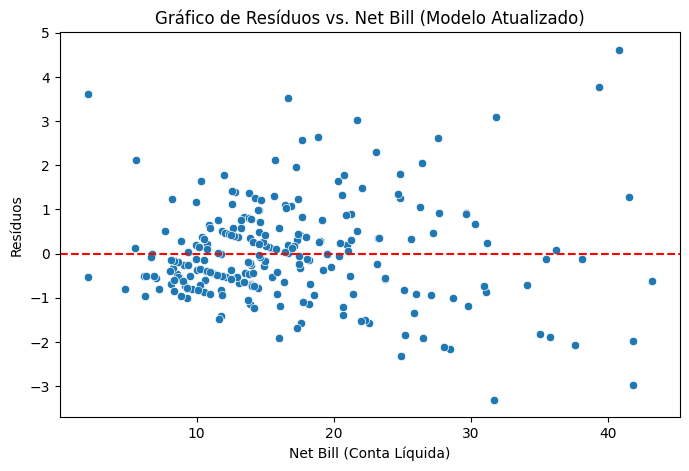

In [8]:
# 1.3 - Gráfico de Resíduos vs. Net Bill

# Carregar a base de dados
tips = sns.load_dataset('tips')

# Criar a variável 'net_bill' (conta líquida = total_bill - tip)
tips['net_bill'] = tips['total_bill'] - tips['tip']

# Definir a matriz de design para o modelo atualizado
y, X = pt.dmatrices('tip ~ net_bill', data=tips, return_type='dataframe')

# Ajustar o modelo OLS atualizado
model = sm.OLS(y, X).fit()

# Calcular resíduos do modelo atualizado
tips['residuals'] = model.resid

# Imprimir as 5 primeiras observações de 'net_bill' e 'residuals'
print(tips[['net_bill', 'residuals']].head())

# Calcular e imprimir a soma dos resíduos e o MSE (Erro Quadrático Médio)
print(f"Soma dos Resíduos: {tips['residuals'].sum():.4f}")
mse = np.mean(tips['residuals'] ** 2)
print(f"MSE (Erro Quadrático Médio): {mse:.4f}")

# Plotar o gráfico de resíduos vs. Net Bill
plt.figure(figsize=(8, 5))
sns.scatterplot(x='net_bill', y='residuals', data=tips)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Net Bill (Conta Líquida)')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos vs. Net Bill (Modelo Atualizado)')
plt.show()

In [16]:
# 1.4 - Teste transformar net_bill no log e um polinômio. Escolha o melhor modelo.

# Criar a variável 'net_bill' (conta líquida = total_bill - tip)
tips['net_bill'] = tips['total_bill'] - tips['tip']

# Modelo 1: Regressão com log de net_bill
y, X_log = pt.dmatrices('np.log(tip) ~ np.log(net_bill)', data=tips, return_type='dataframe')
model_log_net_bill = sm.OLS(y, X_log).fit()

# Modelo 2: Regressão com polinômio de 2º grau em net_bill
y, X_poly = pt.dmatrices('np.log(tip) ~ net_bill + I(net_bill**2)', data=tips, return_type='dataframe')
model_poly_net_bill = sm.OLS(y, X_poly).fit()

# Comparar os resumos dos modelos
print("Modelo com Log de Net Bill:")
print(model_log_net_bill.summary())
print("\nModelo com Polinômio de 2º Grau:")
print(model_poly_net_bill.summary())

# Escolher o melhor modelo com base no R² ajustado
if model_log_net_bill.rsquared_adj > model_poly_net_bill.rsquared_adj:
    print("\nO modelo com log de 'net_bill' é o melhor com base no R² ajustado.")
else:
    print("\nO modelo com polinômio de 2º grau é o melhor com base no R² ajustado.")

Modelo com Log de Net Bill:
                            OLS Regression Results                            
Dep. Variable:            np.log(tip)   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     113.5
Date:                Sun, 13 Oct 2024   Prob (F-statistic):           5.62e-22
Time:                        16:04:18   Log-Likelihood:                -96.357
No. Observations:                 244   AIC:                             196.7
Df Residuals:                     242   BIC:                             203.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept   

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

                            OLS Regression Results                            
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     11.82
Date:                Sun, 13 Oct 2024   Prob (F-statistic):           8.90e-09
Time:                        16:09:09   Log-Likelihood:                -67.723
No. Observations:                 244   AIC:                             145.4
Df Residuals:                     239   BIC:                             162.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -1.6701      0.069    -24.041

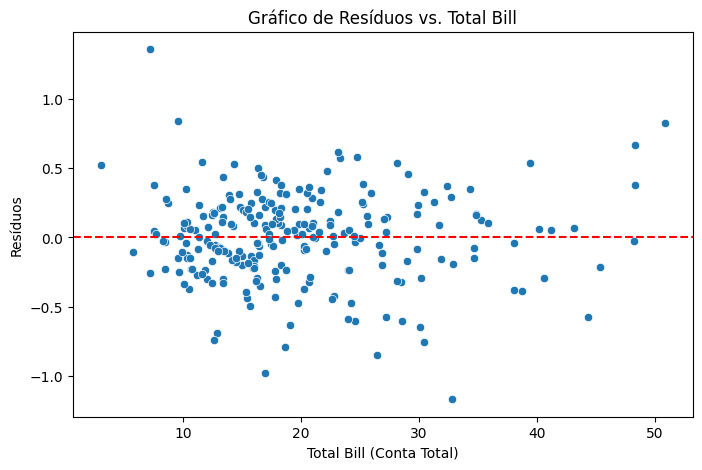

                            OLS Regression Results                            
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     13.27
Date:                Sun, 13 Oct 2024   Prob (F-statistic):           8.86e-10
Time:                        16:09:09   Log-Likelihood:                -65.274
No. Observations:                 244   AIC:                             140.5
Df Residuals:                     239   BIC:                             158.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.8185      0.164     -5.

In [17]:
# 2.1 - Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de tip, explicado por sex, smoker, diner e net_bill.

# Instalar bibliotecas necessárias (execute isto apenas se as bibliotecas não estiverem instaladas)
!pip install pandas numpy statsmodels patsy seaborn scikit-learn

# Importar as bibliotecas necessárias
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import patsy
import matplotlib.pyplot as plt

# Carregar a base de dados de gorjetas
tips = sns.load_dataset('tips')

# Criar a variável 'tip_pct' (percentual de gorjeta)
tips['tip_pct'] = tips['tip'] / tips['total_bill']

# Criar a matriz de design com a variável resposta log(tip_pct)
y, X = patsy.dmatrices('np.log(tip_pct) ~ sex + smoker + size + total_bill', data=tips, return_type='dataframe')

# Ajustar o modelo OLS (Regressão Linear)
model_log_pct = sm.OLS(y, X).fit()

# Resumo do modelo
print(model_log_pct.summary())

# Calcular os resíduos e adicionar à tabela de dados
tips['residuals'] = model_log_pct.resid

# Plotar o gráfico de resíduos em função de total_bill
plt.figure(figsize=(8, 5))
sns.scatterplot(x=tips['total_bill'], y=tips['residuals'])
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Total Bill (Conta Total)')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos vs. Total Bill')
plt.show()

# Testar transformar total_bill no log
tips['log_total_bill'] = np.log(tips['total_bill'] + 1)  # +1 para evitar log(0)

# Ajustar o modelo com total_bill transformado em log
y_log_total_bill, X_log_total_bill = patsy.dmatrices(
    'np.log(tip_pct) ~ sex + smoker + size + log_total_bill',
    data=tips,
    return_type='dataframe'
)
model_log_total_bill = sm.OLS(y_log_total_bill, X_log_total_bill).fit()
print(model_log_total_bill.summary())

# Testar um modelo polinomial para total_bill
X_poly = patsy.dmatrix('total_bill + I(total_bill ** 2)', data=tips)
model_poly = sm.OLS(y, X_poly).fit()
print(model_poly.summary())

# Comparar os R² dos modelos
r2_log_model = model_log_pct.rsquared
r2_log_total_bill_model = model_log_total_bill.rsquared
r2_poly_model = model_poly.rsquared

print(f'R² do modelo com log de tip_pct: {r2_log_model:.4f}')
print(f'R² do modelo com log de total_bill: {r2_log_total_bill_model:.4f}')
print(f'R² do modelo polinomial: {r2_poly_model:.4f}')

In [18]:
# 2.2 - Remova as variáveis não significantes.

# Transformar o tip em log
tips['log_tip'] = np.log(tips['tip'])

# Criar a matriz de design com a variável resposta log_tip
y, X = patsy.dmatrices('log_tip ~ sex + smoker + size + total_bill', data=tips, return_type='dataframe')

# Função para remover variáveis não significativas
def remove_non_significant(X, y, alpha=0.05):
    while True:
        model = sm.OLS(y, X).fit()
        p_values = model.pvalues
        # Verifica se todas as variáveis estão abaixo do limiar de significância
        if (p_values > alpha).any():
            # Remove a variável com maior p-valor
            worst_pval = p_values.idxmax()
            X = X.drop(columns=[worst_pval])
            print(f'Removendo variável: {worst_pval}')
        else:
            break
    return X, model

# Ajustar o modelo e remover variáveis não significativas
X_reduced, model_reduced = remove_non_significant(X, y)

# Resumo do modelo final
print(model_reduced.summary())

Removendo variável: sex[T.Female]
Removendo variável: smoker[T.No]
                            OLS Regression Results                            
Dep. Variable:                log_tip   R-squared:                       0.437
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     93.65
Date:                Sun, 13 Oct 2024   Prob (F-statistic):           8.08e-31
Time:                        16:09:15   Log-Likelihood:                -73.110
No. Observations:                 244   AIC:                             152.2
Df Residuals:                     241   BIC:                             162.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

                            OLS Regression Results                            
Dep. Variable:                log_tip   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     99.26
Date:                Sun, 13 Oct 2024   Prob (F-statistic):           3.58e-32
Time:                        16:09:21   Log-Likelihood:                 7.1099
No. Observations:                 244   AIC:                            -8.220
Df Residuals:                     241   BIC:                             2.272
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8027      0.045     17.769      0.0

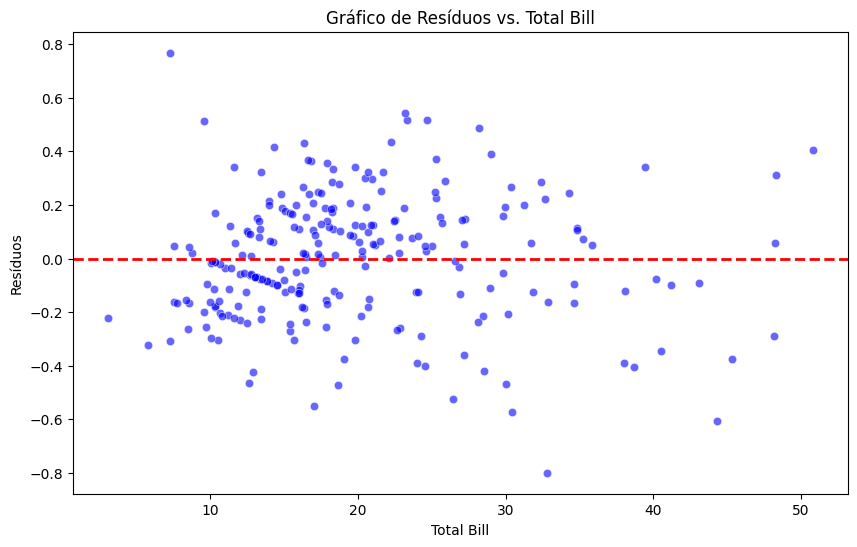

In [19]:
# 2.3 - Observe o gráfico de resíduos em função de net_bill

# Transformar a variável 'tip' usando log
tips['log_tip'] = tips['tip'].apply(lambda x: np.log(x + 1))

# Definindo as variáveis independentes e a dependente
X = tips[['size', 'total_bill']]
y = tips['log_tip']

# Adicionando a constante ao modelo
X = sm.add_constant(X)

# Ajustando o modelo OLS
model = sm.OLS(y, X).fit()

# Imprimindo os resultados do modelo
print(model.summary())

# Calculando os resíduos
residuals = model.resid

# Criando o gráfico de resíduos em função de total_bill
plt.figure(figsize=(10, 6))
sns.scatterplot(x=tips['total_bill'], y=residuals, color='blue', alpha=0.6)
plt.axhline(0, color='red', linestyle='--', linewidth=2)  # Linha horizontal em y=0
plt.title('Gráfico de Resíduos vs. Total Bill')
plt.xlabel('Total Bill')
plt.ylabel('Resíduos')
plt.show()

Modelo Linear:
                            OLS Regression Results                            
Dep. Variable:                log_tip   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     207.1
Date:                Sun, 13 Oct 2024   Prob (F-statistic):           2.39e-34
Time:                        16:09:45   Log-Likelihood:                 9.2478
No. Observations:                 244   AIC:                            -14.50
Df Residuals:                     242   BIC:                            -7.501
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.2092    

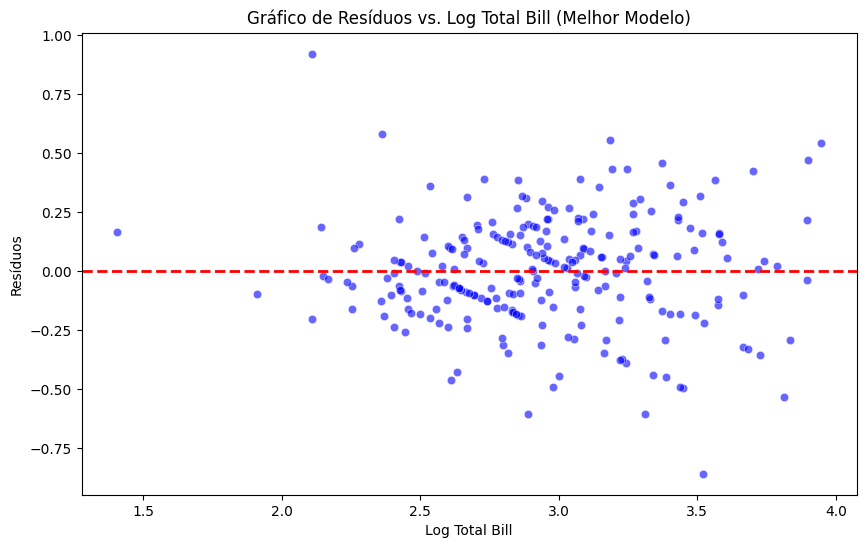

In [21]:
# 2.4 - Teste transformar net_bill no log e um polinômio. Escolha o melhor modelo.

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

# Transformação logarítmica da variável 'total_bill'
tips['log_total_bill'] = np.log(tips['total_bill'] + 1)

# Definindo a variável dependente
y = tips['log_tip']

# Ajustando o modelo linear com 'log_total_bill'
X_linear = sm.add_constant(tips['log_total_bill'])
model_linear = sm.OLS(y, X_linear).fit()

# Ajustando um modelo polinomial de grau 2
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(tips['log_total_bill'].values.reshape(-1, 1))

# Ajustando o modelo polinomial
model_poly = sm.OLS(y, X_poly).fit()

# Imprimindo os resultados dos modelos
print("Modelo Linear:")
print(model_linear.summary())
print("\nModelo Polinomial:")
print(model_poly.summary())

# Comparando os R² ajustados
r_squared_adj_linear = model_linear.rsquared_adj
r_squared_adj_poly = model_poly.rsquared_adj

print(f"\nR² Ajustado do Modelo Linear: {r_squared_adj_linear:.4f}")
print(f"R² Ajustado do Modelo Polinomial: {r_squared_adj_poly:.4f}")

# Escolhendo o melhor modelo
if r_squared_adj_linear > r_squared_adj_poly:
    print("\nO modelo linear é o melhor modelo.")
else:
    print("\nO modelo polinomial é o melhor modelo.")

# Gráfico dos Resíduos para o melhor modelo
best_model = model_linear if r_squared_adj_linear > r_squared_adj_poly else model_poly
residuals = best_model.resid

plt.figure(figsize=(10, 6))
sns.scatterplot(x=tips['log_total_bill'], y=residuals, color='blue', alpha=0.6)
plt.axhline(0, color='red', linestyle='--', linewidth=2)  # Linha horizontal em y=0
plt.title('Gráfico de Resíduos vs. Log Total Bill (Melhor Modelo)')
plt.xlabel('Log Total Bill')
plt.ylabel('Resíduos')
plt.show()



# Comparação dos Modelos e Análise dos Coeficientes de Determinação (R²)

## Coeficientes de Determinação (R²)

A seguir, apresentamos os R² dos diferentes modelos para comparação:

- **Modelo Linear com `log_tip`**  
  - **R²**: 0.461  
  - **R² Ajustado**: 0.459  

- **Modelo Polinomial**  
  - **R²**: 0.462  
  - **R² Ajustado**: 0.458  

- **Modelo Linear com `log_total_bill`**  
  - **R²**: 0.472  

- **Modelo 1 - Regressão Linear Simples (`np.log(tip_pct)`)**  
  - **R²**: 0.165  
  - **R² Ajustado**: 0.151  

## Comparação dos Modelos

1. **Melhor Desempenho**  
   O **modelo com `log_total_bill`** é o melhor entre os apresentados, com **R² = 0.472**. Isso significa que ele explica a maior parte da variação na variável dependente.

2. **Diferença entre Linear e Polinomial**  
   - Ambos os modelos (linear e polinomial) possuem desempenho semelhante, com **R² Ajustado** de 0.459 e 0.458, respectivamente.  
   - Portanto, o modelo **linear** é preferível, pois apresenta uma estrutura mais simples e praticamente o mesmo desempenho.

3. **Modelo com `np.log(tip_pct)`**  
   - Esse modelo apresentou o **menor R² (0.165)**, indicando baixa capacidade de explicar a variação na variável dependente.

---

## Conclusão

O **modelo com `log_total_bill`** é o mais adequado para explicar a variável dependente, seguido pelo modelo linear e polinomial. O modelo com `np.log(tip_pct)` apresenta desempenho inferior e não é recomendado.

---

## Dependências Utilizadas

```bash
# Bibliotecas instaladas
pandas==2.2.2
numpy==1.26.4
statsmodels==0.14.4
patsy==0.5.6
seaborn==0.13.2
scikit-learn==1.5.2


### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

Modelo Linear:
                            OLS Regression Results                            
Dep. Variable:                log_tip   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     207.1
Date:                Sun, 13 Oct 2024   Prob (F-statistic):           2.39e-34
Time:                        17:17:59   Log-Likelihood:                 9.2478
No. Observations:                 244   AIC:                            -14.50
Df Residuals:                     242   BIC:                            -7.501
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.2092    

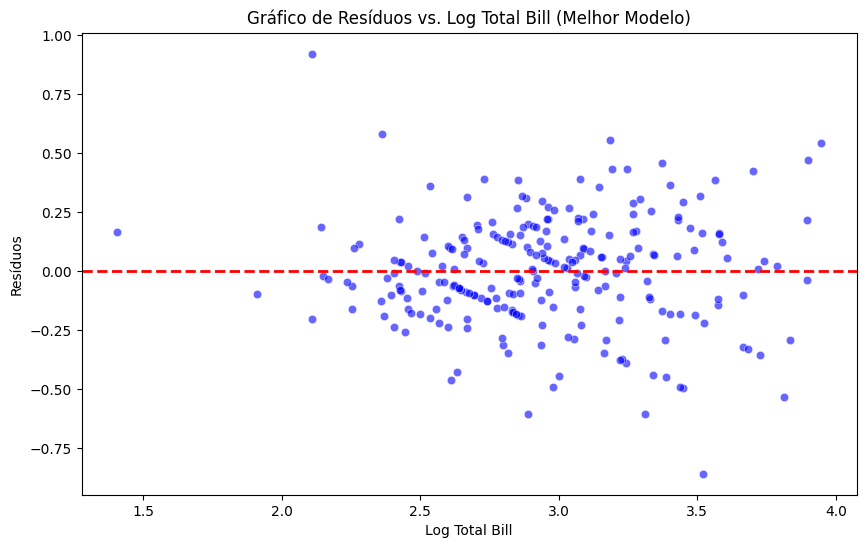

In [45]:
# 3.1 - - Teste transformar net_bill no log e um polinômio. Escolha o melhor modelo.

import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Transformação logarítmica da variável 'total_bill'
tips['log_total_bill'] = np.log(tips['total_bill'] + 1)

# Definindo a variável dependente
y = tips['log_tip']

# Ajustando o modelo linear com 'log_total_bill'
X_linear = sm.add_constant(tips['log_total_bill'])
model_linear = sm.OLS(y, X_linear).fit()

# Ajustando um modelo polinomial de grau 2
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(tips['log_total_bill'].values.reshape(-1, 1))

# Ajustando o modelo polinomial
model_poly = sm.OLS(y, X_poly).fit()

# Imprimindo os resultados dos modelos
print("Modelo Linear:")
print(model_linear.summary())
print("\nModelo Polinomial:")
print(model_poly.summary())

# Comparando os R² ajustados
r_squared_adj_linear = model_linear.rsquared_adj
r_squared_adj_poly = model_poly.rsquared_adj

print(f"\nR² Ajustado do Modelo Linear: {r_squared_adj_linear:.4f}")
print(f"R² Ajustado do Modelo Polinomial: {r_squared_adj_poly:.4f}")

# Escolhendo o melhor modelo
if r_squared_adj_linear > r_squared_adj_poly:
    print("\nO modelo linear é o melhor modelo.")
else:
    print("\nO modelo polinomial é o melhor modelo.")

# Gráfico dos Resíduos para o melhor modelo
best_model = model_linear if r_squared_adj_linear > r_squared_adj_poly else model_poly
residuals = best_model.resid

plt.figure(figsize=(10, 6))
sns.scatterplot(x=tips['log_total_bill'], y=residuals, color='blue', alpha=0.6)
plt.axhline(0, color='red', linestyle='--', linewidth=2)  # Linha horizontal em y=0
plt.title('Gráfico de Resíduos vs. Log Total Bill (Melhor Modelo)')
plt.xlabel('Log Total Bill')
plt.ylabel('Resíduos')
plt.show()




Verificando valores ausentes e infinitos:
tempo_emprego    2573
renda               0
dtype: int64
tempo_emprego    0
renda            0
dtype: int64


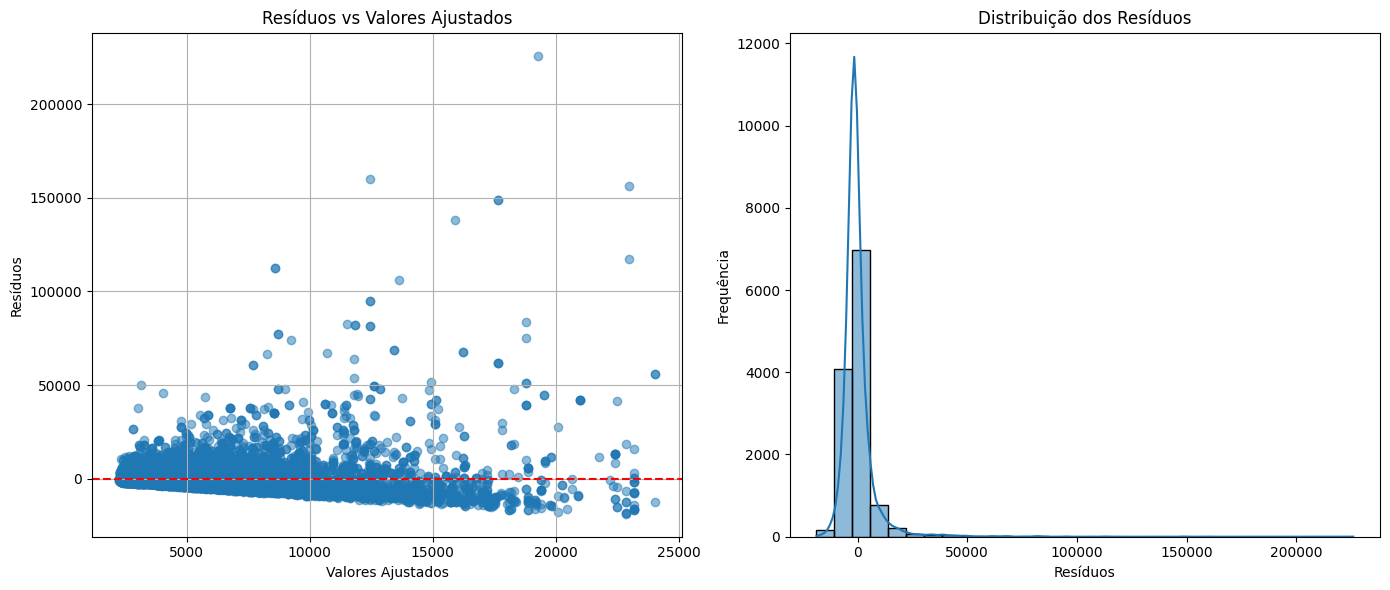

Shapiro-Wilk Test: W=0.5719, p-value=0.0000
                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     2162.
Date:                Sun, 13 Oct 2024   Prob (F-statistic):               0.00
Time:                        16:46:22   Log-Likelihood:            -1.2963e+05
No. Observations:               12427   AIC:                         2.593e+05
Df Residuals:                   12425   BIC:                         2.593e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
co

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 12427.
  res = hypotest_fun_out(*samples, **kwds)


In [31]:
# 3.2 - Faça uma análise de resíduos. Com os recursos vistos neste módulo,
#como você melhoraria esta regressão?

# Verificar se há valores ausentes e infinitos
print("\nVerificando valores ausentes e infinitos:")
print(data[['tempo_emprego', 'renda']].isnull().sum())  # Contagem de valores ausentes
print((data[['tempo_emprego', 'renda']] == float('inf')).sum())  # Contagem de valores infinitos

# Remover linhas com valores ausentes
data = data.dropna(subset=['tempo_emprego', 'renda'])

# Garantir que não há valores infinitos
data = data[~data[['tempo_emprego', 'renda']].isin([float('inf'), -float('inf')]).any(axis=1)]

# Definir as variáveis dependente e independente
X = data[['tempo_emprego']]
y = data['renda']

# Adicionar uma constante para o modelo
X = sm.add_constant(X)

# Ajustar o modelo de regressão linear
modelo = sm.OLS(y, X).fit()

# Cálculo dos resíduos
residuos = modelo.resid

# Criar um DataFrame para os resíduos
data['residuos'] = residuos

# Gráfico dos resíduos
plt.figure(figsize=(14, 6))

# Gráfico 1: Resíduos vs Valores Ajustados
plt.subplot(1, 2, 1)
plt.scatter(modelo.fittedvalues, residuos, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Resíduos vs Valores Ajustados')
plt.xlabel('Valores Ajustados')
plt.ylabel('Resíduos')
plt.grid()

# Gráfico 2: Histograma dos Resíduos
plt.subplot(1, 2, 2)
sns.histplot(residuos, bins=30, kde=True)
plt.title('Distribuição dos Resíduos')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

# Teste de normalidade (Shapiro-Wilk)
shapiro_test = shapiro(residuos)
print(f'Shapiro-Wilk Test: W={shapiro_test.statistic:.4f}, p-value={shapiro_test.pvalue:.4f}')

# Exibir os resultados do modelo
print(modelo.summary())

# Análise e melhorias sugeridas
print("\nAnálise e melhorias sugeridas:")
print("- Adicionar variáveis explicativas, como idade, educação, e outras variáveis que possam impactar a renda.")
print("- Explorar transformações nas variáveis, como log ou polinômio, para melhorar a linearidade.")
print("- Verificar a presença de outliers e considerar técnicas de robustez na análise.")
print("- Avaliar interações entre variáveis para potencializar o modelo, como a interação entre 'tempo_emprego' e 'idade'.")
print("- Utilizar validação cruzada para evitar overfitting e garantir que o modelo generalize bem em novos dados.")

In [53]:
# 3.3 -

import pandas as pd
import numpy as np
import statsmodels.api as sm

# Converter 'tempo_emprego', 'idade', 'qtd_filhos', e 'log_renda' para float
data['tempo_emprego'] = pd.to_numeric(data['tempo_emprego'], errors='coerce')
data['idade'] = pd.to_numeric(data['idade'], errors='coerce')
data['qtd_filhos'] = pd.to_numeric(data['qtd_filhos'], errors='coerce')
data['log_renda'] = pd.to_numeric(data['log_renda'], errors='coerce')

# Remover linhas com dados faltantes após a conversão
data.dropna(subset=['tempo_emprego', 'idade', 'qtd_filhos', 'log_renda'], inplace=True)

# Definir as variáveis independentes (incluir todas as relevantes)
X = data[['tempo_emprego', 'idade', 'qtd_filhos', 'posse_de_veiculo', 'posse_de_imovel']]

# Adicionar variáveis categóricas usando dummies
categorical_vars = ['sexo', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia']
X = pd.get_dummies(data[categorical_vars], drop_first=True).join(X)

# Adicionar uma constante para o modelo
X = sm.add_constant(X)

# Converter variáveis booleanas para inteiros
X = X.astype(int)

# Variável dependente
y = data['log_renda']

# Função para ajustar o modelo e remover variáveis não significativas
def ajustar_modelo(X, y):
    modelo = sm.OLS(y, X).fit()
    return modelo

# Ajustar o modelo inicialmente
modelo_multiplo = ajustar_modelo(X, y)

# Exibir os resultados do resumo do modelo
print("Resultados do modelo de regressão inicial:")
print(modelo_multiplo.summary())

# Remover variáveis não significativas (p-valor > 0.05)
while True:
    pval = modelo_multiplo.pvalues
    max_pval = pval.max()

    if max_pval > 0.05:
        # Remove a variável com maior p-valor
        variable_to_remove = pval.idxmax()
        X = X.drop(variable_to_remove, axis=1)

        # Reajustar o modelo após a remoção
        modelo_multiplo = ajustar_modelo(X, y)
    else:
        break

# Exibir os resultados do modelo ajustado
print("Resultados do modelo de regressão ajustado:")
print(modelo_multiplo.summary())

# Verificar a estrutura dos dados
print("\nInformações do DataFrame:")
print(data.info())

# Verificar valores ausentes
print("\nValores ausentes em cada coluna:")
print(data.isnull().sum())


Resultados do modelo de regressão inicial:
                            OLS Regression Results                            
Dep. Variable:              log_renda   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                     297.5
Date:                Sun, 13 Oct 2024   Prob (F-statistic):               0.00
Time:                        17:39:12   Log-Likelihood:                -13586.
No. Observations:               12427   AIC:                         2.722e+04
Df Residuals:                   12403   BIC:                         2.740e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

In [56]:
import pandas as pd

# Supondo que você já tenha carregado seus dados em um DataFrame chamado df
# Exemplo: df = pd.read_csv('caminho/para/seu/dataset.csv')

# Exibindo os nomes das colunas e os tipos de dados
print(df.dtypes)

# Se preferir uma visualização mais formatada
print("Nomes das colunas e tipos de dados:")
for column, dtype in zip(df.columns, df.dtypes):
    print(f"{column}: {dtype}")


Unnamed: 0                         int64
data_ref                          object
id_cliente                         int64
posse_de_veiculo                    bool
posse_de_imovel                     bool
qtd_filhos                       float64
idade                              int64
tempo_emprego                    float64
qt_pessoas_residencia            float64
renda                            float64
sexo_M                              bool
tipo_renda_Bolsista                 bool
tipo_renda_Empresário               bool
tipo_renda_Pensionista              bool
tipo_renda_Servidor público         bool
educacao_Pós graduação              bool
educacao_Secundário                 bool
educacao_Superior completo          bool
educacao_Superior incompleto        bool
estado_civil_Separado               bool
estado_civil_Solteiro               bool
estado_civil_União                  bool
estado_civil_Viúvo                  bool
tipo_residencia_Casa                bool
tipo_residencia_

In [76]:
# 3.4
# Converter 'tempo_emprego', 'idade', 'qtd_filhos', e 'log_renda' para float
data['tempo_emprego'] = pd.to_numeric(data['tempo_emprego'], errors='coerce')
data['idade'] = pd.to_numeric(data['idade'], errors='coerce')
data['qtd_filhos'] = pd.to_numeric(data['qtd_filhos'], errors='coerce')
data['log_renda'] = pd.to_numeric(data['log_renda'], errors='coerce')

# Remover linhas com dados faltantes após a conversão
data.dropna(subset=['tempo_emprego', 'idade', 'qtd_filhos', 'log_renda'], inplace=True)

# Definir as variáveis independentes (incluir todas as relevantes)
X = data[['tempo_emprego', 'idade', 'qtd_filhos', 'posse_de_veiculo', 'posse_de_imovel']]

# Adicionar variáveis categóricas usando dummies
categorical_vars = ['sexo', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia']
X = pd.get_dummies(data[categorical_vars], drop_first=True).join(X)

# Adicionar uma constante para o modelo
X = sm.add_constant(X)

# Converter variáveis booleanas para inteiros
X = X.astype(int)

# Variável dependente
y = data['log_renda']

# Função para ajustar o modelo e remover variáveis não significativas
def ajustar_modelo(X, y):
    modelo = sm.OLS(y, X).fit()
    return modelo

# Ajustar o modelo inicialmente
modelo_multiplo = ajustar_modelo(X, y)

# Exibir os resultados do resumo do modelo
print("Resultados do modelo de regressão inicial:")
print(modelo_multiplo.summary())

# Remover variáveis não significativas (p-valor > 0.05)
while True:
    pval = modelo_multiplo.pvalues
    max_pval = pval.max()

    if max_pval > 0.05:
        # Remove a variável com maior p-valor
        variable_to_remove = pval.idxmax()
        X = X.drop(variable_to_remove, axis=1)

        # Reajustar o modelo após a remoção
        modelo_multiplo = ajustar_modelo(X, y)
    else:
        break

# Exibir os resultados do modelo ajustado
print("Resultados do modelo de regressão ajustado:")
print(modelo_multiplo.summary())

# Verificar a estrutura dos dados
print("\nInformações do DataFrame:")
print(data.info())

# Verificar valores ausentes
print("\nValores ausentes em cada coluna:")
print(data.isnull().sum())

Resultados do modelo de regressão inicial:
                            OLS Regression Results                            
Dep. Variable:              log_renda   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                     297.5
Date:                Sun, 13 Oct 2024   Prob (F-statistic):               0.00
Time:                        18:24:24   Log-Likelihood:                -13586.
No. Observations:               12427   AIC:                         2.722e+04
Df Residuals:                   12403   BIC:                         2.740e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

Colunas do DataFrame: Index(['Unnamed: 0', 'data_ref', 'id_cliente', 'sexo', 'posse_de_veiculo',
       'posse_de_imovel', 'qtd_filhos', 'tipo_renda', 'educacao',
       'estado_civil', 'tipo_residencia', 'idade', 'tempo_emprego',
       'qt_pessoas_residencia', 'renda'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:              log_renda   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     2564.
Date:                Sun, 13 Oct 2024   Prob (F-statistic):               0.00
Time:                        18:26:12   Log-Likelihood:                -15150.
No. Observations:               12427   AIC:                         3.030e+04
Df Residuals:                   12425   BIC:                         3.032e+04
Df Model:                           1                                    

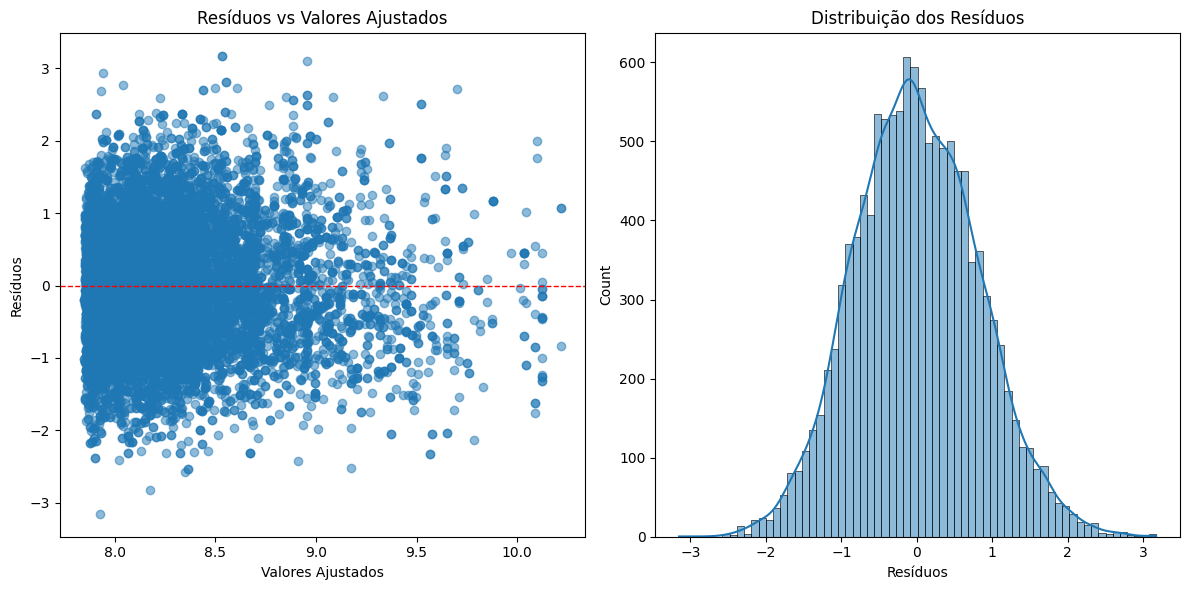

                           Teste     Resultado
0  Lagrange multiplier statistic  1.285886e+02
1                        p-value  8.343941e-30
2                        f-value  1.299121e+02
3                      f p-value  6.032245e-30
Teste de Shapiro-Wilk: Estatística=0.9989022247161662, p-value=1.938716130408068e-07


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 12427.
  res = hypotest_fun_out(*samples, **kwds)


In [77]:
# 3.5 - Faça uma análise de resíduos. Avalie a qualidade do ajuste.

import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

# Carregando os dados
df = pd.read_csv('previsao_de_renda.csv')  # Substitua pelo caminho do seu arquivo

# Verificando os nomes das colunas
print("Colunas do DataFrame:", df.columns)

# Transformando a variável de resposta
df['log_renda'] = np.log(df['renda'])  # Aplicando log na variável de renda

# Definindo a variável de resposta e as variáveis independentes
X = df[['tempo_emprego']]  # Substitua por outras variáveis conforme necessário
y = df['log_renda']

# Verificando e removendo valores ausentes
df = df.dropna(subset=['tempo_emprego', 'log_renda'])  # Removendo linhas com NaN em X ou y

# Redefinindo X e y após a remoção de NaNs
X = df[['tempo_emprego']]
y = df['log_renda']

# Adicionando a constante
X = sm.add_constant(X)

# Ajustando o modelo
model = sm.OLS(y, X).fit()

# Resumo do modelo
print(model.summary())

# Análise de Resíduos
# Obtendo os resíduos
residuals = model.resid
fitted = model.fittedvalues

# Plotando os resíduos
plt.figure(figsize=(12, 6))

# Gráfico de Resíduos vs Fitted
plt.subplot(1, 2, 1)
plt.scatter(fitted, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title('Resíduos vs Valores Ajustados')
plt.xlabel('Valores Ajustados')
plt.ylabel('Resíduos')

# Histograma dos Resíduos
plt.subplot(1, 2, 2)
sns.histplot(residuals, kde=True)
plt.title('Distribuição dos Resíduos')
plt.xlabel('Resíduos')

plt.tight_layout()
plt.show()

# Teste de Heterocedasticidade - Breusch-Pagan
from statsmodels.stats.diagnostic import het_breuschpagan

# Teste de Breusch-Pagan
bp_test = het_breuschpagan(residuals, X)
bp_test_results = pd.DataFrame({'Teste': ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'],
                                 'Resultado': bp_test})
print(bp_test_results)

# Teste de Normalidade - Shapiro-Wilk
from scipy import stats

shapiro_test = stats.shapiro(residuals)
print(f'Teste de Shapiro-Wilk: Estatística={shapiro_test.statistic}, p-value={shapiro_test.pvalue}')

# Análise do Modelo de Regressão

## 1. Teste de Heterocedasticidade - Breusch-Pagan
- **Estatística Lagrange:** 128.59  
- **p-value:** \(8.34 \times 10^{-30}\)

**Interpretação:**  
Rejeitamos a hipótese nula de homocedasticidade, indicando que a variância dos resíduos não é constante, o que pode comprometer a validade do modelo.

## 2. Teste de Normalidade - Shapiro-Wilk
- **Estatística:** 0.9989  
- **p-value:** \(1.94 \times 10^{-7}\)

**Interpretação:**  
Os resíduos não seguem uma distribuição normal, o que pode afetar a precisão dos intervalos de confiança e testes de significância.

## 3. Tamanho da Amostra
- O p-value do teste de normalidade pode não ser preciso para \(N > 5000\). Com 12.427 observações, pequenos desvios da normalidade podem resultar em p-values baixos.

## 4. Implicações para o Modelo
- A heterocedasticidade e a não normalidade indicam que o modelo OLS pode não ser adequado, impactando a validade das estimativas.

## 5. Ações Recomendadas
1. **Transformações de Variáveis:** Aplicar transformações para estabilizar a variância.
2. **Modelos Alternativos:** Considerar modelos que não assumem homocedasticidade, como a regressão robusta.
3. **Verificação de Outliers:** Investigar outliers que possam influenciar a variabilidade dos resíduos.

## 6. Conclusão
Os resultados sugerem que o modelo de regressão linear simples pode não ser adequado. Abordagens alternativas devem ser consideradas para melhor modelar a relação entre as variáveis.
